<a href="https://colab.research.google.com/github/AbuObaida01/VOIS_AICTE_Oct2025_AbuObaida/blob/main/Airbnb_Hotel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Important Libraries and Loading the data
###

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/1730285881-Airbnb_Open_Data.xlsx'
df = pd.read_excel(file_path, sheet_name='in', nrows=100000, dtype=str)
print("Shape of the dataset", df.shape)


Shape of the dataset (100000, 26)


## Getting A look at the data


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              100000 non-null  object
 1   NAME                            99735 non-null   object
 2   host id                         100000 non-null  object
 3   host_identity_verified          99711 non-null   object
 4   host name                       99607 non-null   object
 5   neighbourhood group             99971 non-null   object
 6   neighbourhood                   99984 non-null   object
 7   lat                             99992 non-null   object
 8   long                            99992 non-null   object
 9   country                         99520 non-null   object
 10  country code                    99883 non-null   object
 11  instant_bookable                99895 non-null   object
 12  cancellation_policy            

## Looking at first 5 rows


In [ ]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193,10,9,2021-10-19 00:00:00,0.21,4,6,286,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28,30,45,2022-05-21 00:00:00,0.38,4,2,228,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,124,3,0,NaN,NaN,5,1,352,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74,30,270,2019-07-05 00:00:00,4.64,4,1,322,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41,10,9,2018-11-19 00:00:00,0.1,3,1,289,"Please no smoking in the house, porch or on th...",NaN


## Calculating the missing values


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


NAME                                265
host_identity_verified              289
host name                           393
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             480
country code                        117
instant_bookable                    105
cancellation_policy                  76
Construction year                   202
price                               241
service fee                         253
minimum nights                      400
number of reviews                   181
last review                       15485
reviews per month                 15471
review rate number                  314
calculated host listings count      296
availability 365                    448
house_rules                       53758
license                           99998
dtype: int64


In [ ]:
if 'license' in df.columns:
    df.drop(columns=['license'], inplace=True)
    print("Dropped 'license' column.")

for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Cleaned and converted '{col}' to a numeric type.")


for col in ['lat', 'long', 'Construction year', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
    print("Converted 'last review' to a datetime type.")


Cleaned and converted 'price' to a numeric type.
Cleaned and converted 'service fee' to a numeric type.
Converted 'last review' to a datetime type.


In [ ]:
if 'license' in df.columns:
    df.drop(columns=['license'], inplace=True)
    print("Dropped 'license' column.")

for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Converted '{col}' to numeric.")

numeric_cols = ['lat', 'long', 'Construction year', 'minimum nights', 'number of reviews',
                'reviews per month', 'review rate number', 'calculated host listings count',
                'availability 365']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

print("Converted all other numeric and date columns.")

numeric_fill_cols = ['price', 'service fee', 'lat', 'long', 'Construction year', 'minimum nights',
                     'number of reviews', 'reviews per month', 'review rate number',
                     'calculated host listings count', 'availability 365']
for col in numeric_fill_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

print("Filled missing values in all numeric columns with their median.")

categorical_cols = ['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
                    'neighbourhood', 'country', 'country code', 'instant_bookable',
                    'cancellation_policy', 'room type', 'house_rules']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

print("Filled missing values in all categorical columns with 'Unknown'.")


if 'last review' in df.columns:
    df['last review'] = df['last review'].fillna(pd.Timestamp('1970-01-01'))
    print("Filled missing 'last review' dates with a placeholder (1970-01-01).")

remaining_missing = df.isnull().sum().sum()
if remaining_missing == 0:
    print("\nSuccess! All missing values have been handled.")
else:
    print(f"\nWarning: There are still {remaining_missing} missing values remaining.")



Converted 'price' to numeric.
Converted 'service fee' to numeric.
Converted all other numeric and date columns.
Filled missing values in all numeric columns with their median.
Filled missing values in all categorical columns with 'Unknown'.
Filled missing 'last review' dates with a placeholder (1970-01-01).

Success! All missing values have been handled.


In [ ]:
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])


Series([], dtype: int64)


## Result 1


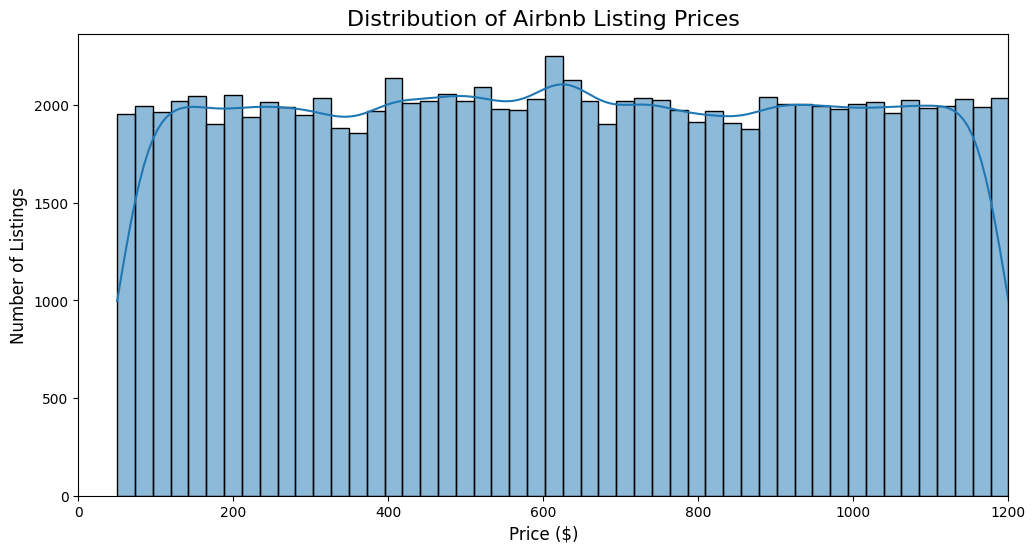

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Listing Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xlim(0, 1200)
plt.show()


## Result 2

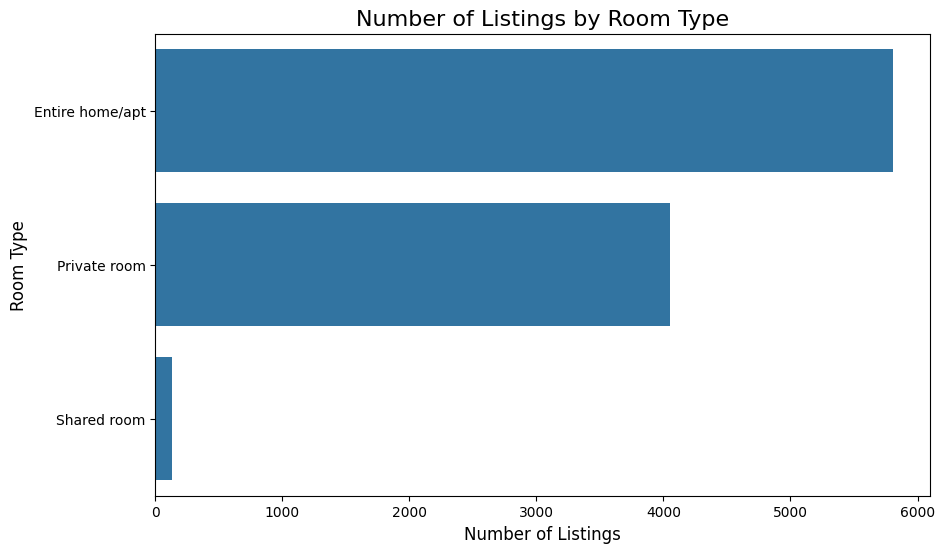

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index)
plt.title('Number of Listings by Room Type', fontsize=16)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Room Type', fontsize=12)
plt.show()


## Result3

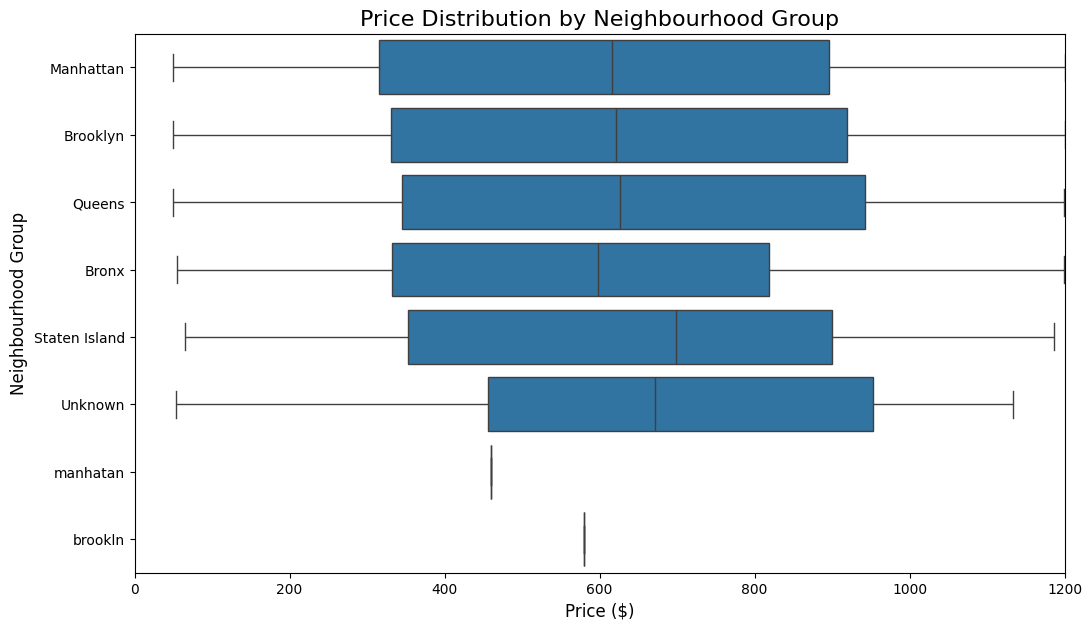

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='neighbourhood group', x='price', data=df, order=df['neighbourhood group'].value_counts().index)
plt.title('Price Distribution by Neighbourhood Group', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Neighbourhood Group', fontsize=12)
plt.xlim(0, 1200)
plt.show()
